In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
df=pd.read_csv("train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [56]:
df.shape

(891, 12)

In [57]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [58]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
#fillling median values in age and cabin columns

In [63]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.Age.isna().any()

False

In [64]:
np.random.seed(42)
df["Cabin"].fillna(np.random.choice(['C','E','G','D','A','B','F']),inplace=True)
df.Cabin.isna().any()

False

In [65]:
df.dropna(inplace=True)

In [66]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [67]:
df['Survived']=df.Survived.map({0:'Not Survived',1:'Survived'})

In [68]:
df.Survived.value_counts()

Not Survived    549
Survived        340
Name: Survived, dtype: int64

In [69]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [70]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:
df['Pclass']=df.Pclass.map({1:'first',2:'Second',3:'third'})
df.Pclass.value_counts()

third     491
first     214
Second    184
Name: Pclass, dtype: int64

In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Not Survived,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,F,S
1,2,Survived,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,F,S
3,4,Survived,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Not Survived,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,F,S


<AxesSubplot:>

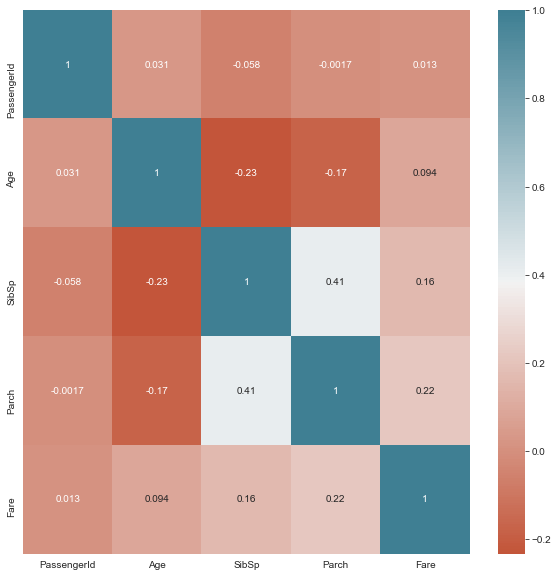

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap=sns.diverging_palette (20, 220, n=200),annot=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

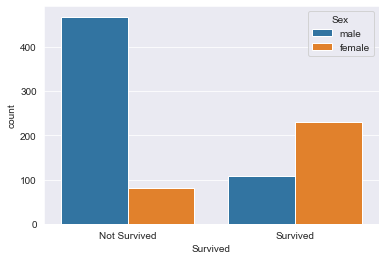

In [74]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=df)

In [75]:
df['Pclass'].value_counts()

third     491
first     214
Second    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

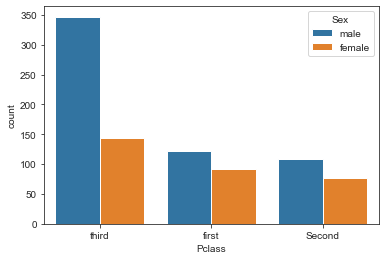

In [76]:
sns.set_style('ticks')
sns.countplot(x='Pclass',hue='Sex',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

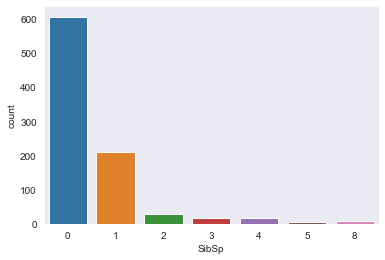

In [78]:
sns.set_style('dark')
sns.countplot(x='SibSp',data=df)

In [ ]:
#BIVARIENT ANALYSIS

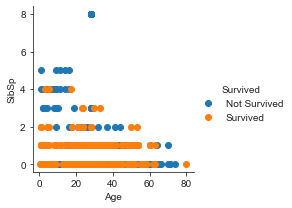

In [83]:
sns.set_style('ticks', {"xtick.major.size": 145, "ytick.major.size": 145})
sns.FacetGrid(df,hue='Survived').map(plt.scatter,"Age","SibSp").add_legend()

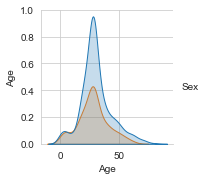

In [90]:
sns.set_style('whitegrid')
sns.pairplot(df,hue='Sex',vars=['Age'])

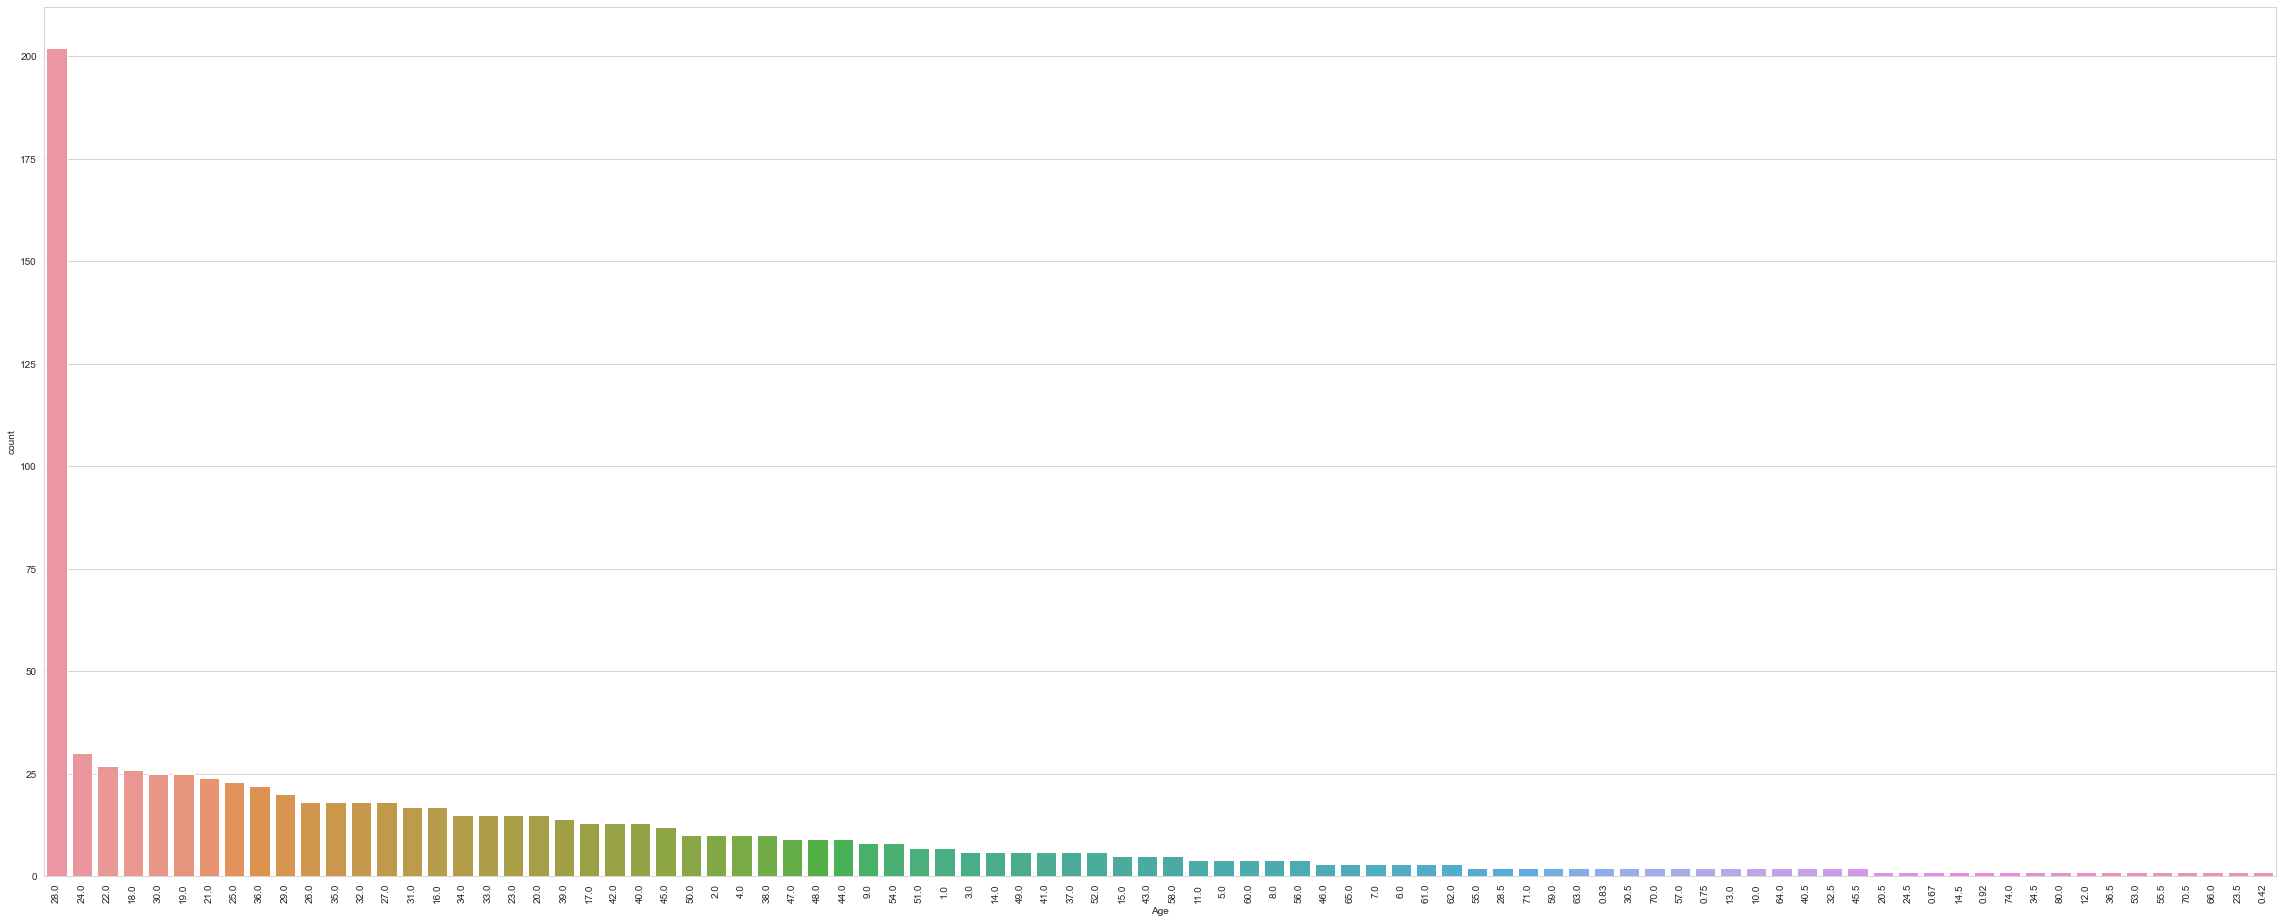

In [94]:
plt.figure(figsize=(40,16))
sns.countplot(x='Age',data=df,order=df['Age'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

C:\Users\singh\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\singh\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


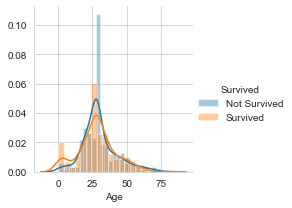

In [99]:

sns.FacetGrid(df,hue='Survived').map(sns.distplot,"Age").add_legend()

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

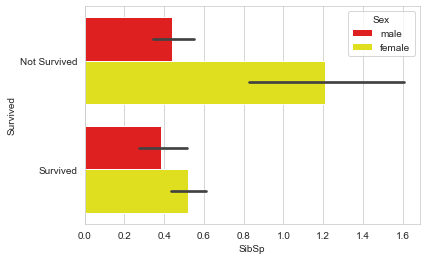

In [105]:

sns.barplot(x='SibSp',y='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

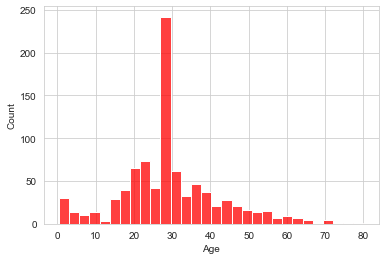

In [107]:
sns.histplot(df['Age'])

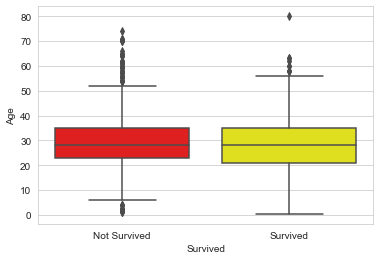

In [109]:
sns.set_palette(P)
sns.boxplot(x='Survived',y='Age',data=df)
plt.show()